<a href="https://colab.research.google.com/github/JoaoDaross/CursoAwari/blob/main/AnaliseExploratoriaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
fonte = 'https://raw.githubusercontent.com/JoaoDaross/CursoAwari/main/dados_mercado_livre.csv'

df = pd.read_csv(fonte)

In [4]:
df.head()

,zona,precos,quartos,areas
0,sul,500000.0,2.0,51.0
1,sul,1555.0,2.0,80.0
2,sul,800000.0,2.0,51.0
3,sul,20000.0,NaN,386.0
4,sul,2500.0,3.0,105.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,1152.0,62820.335069,215251.654924,1000.0,1677.5,2500.0,4000.0,990000.0
quartos,1122.0,2.132799,0.875483,1.0,2.0,2.0,3.0,6.0
areas,1149.0,99.520453,150.248838,6.0,50.0,67.0,100.0,2700.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     1152 non-null   object 
 1   precos   1152 non-null   float64
 2   quartos  1122 non-null   float64
 3   areas    1149 non-null   float64
dtypes: float64(3), object(1)
memory usage: 36.1+ KB


In [7]:
df['precos'] = df['precos'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     1152 non-null   object 
 1   precos   1152 non-null   float64
 2   quartos  1122 non-null   float64
 3   areas    1149 non-null   float64
dtypes: float64(3), object(1)
memory usage: 36.1+ KB


# Fazendo a análise exploratória e o preprocessamento dos dados

In [9]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(df, 
                                 stratify=df['zona'], # preserva a proporção original das zonas na amostra
                                 test_size=0.25, 
                                 random_state=0)

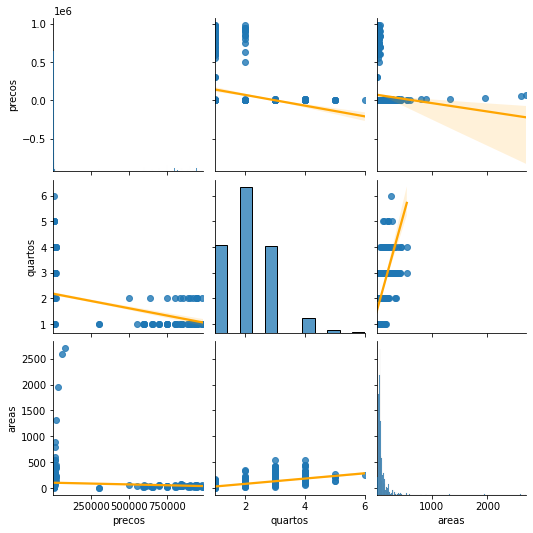

In [10]:
import seaborn as sns

sns.pairplot(treino, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

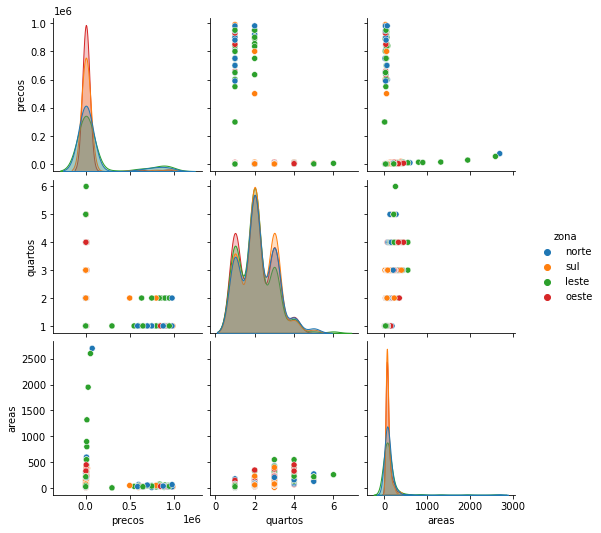

In [11]:
sns.pairplot(treino, hue='zona');

Tratando os dados numéricos

In [12]:
num_cols = ['quartos', 'areas', 'precos']
treino_num = treino[num_cols]

In [13]:
treino_num.head()

,quartos,areas,precos
306,1.0,150.0,1100.0
173,2.0,48.0,1501.0
537,3.0,215.0,2500.0
632,2.0,55.0,1800.0
170,3.0,121.0,3000.0


In [14]:
treino.isnull().sum()

zona        0
precos      0
quartos    19
areas       3
dtype: int64

In [15]:
# preenchendo valores faltantes com a mediana
treino_medianas = treino_num.median()

treino_num = treino_num.fillna(treino_medianas)
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 306 to 620
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quartos  864 non-null    float64
 1   areas    864 non-null    float64
 2   precos   864 non-null    float64
dtypes: float64(3)
memory usage: 27.0 KB


In [16]:
treino_num.isnull().sum()

quartos    0
areas      0
precos     0
dtype: int64

In [17]:
import numpy as np

# aplicando log1p nos dados numéricos
# log1p é o mesmo de log(1 + número), evita distorções no resultado para logs de números pequenos (que seriam zerados)
treino_num = treino_num.apply(np.log1p)

In [18]:
treino_num

,quartos,areas,precos
306,0.693147,5.017280,7.003974
173,1.098612,3.891820,7.314553
537,1.386294,5.375278,7.824446
632,1.098612,4.025352,7.496097
170,1.386294,4.804021,8.006701
...,...,...,...
162,1.098612,4.143135,7.735870
56,1.386294,4.394449,7.438384
699,1.791759,5.398163,7.650169
792,0.693147,3.931826,6.908755


In [19]:
treino_num.describe().T

,count,mean,std,min,25%,50%,75%,max
quartos,864.0,1.094959,0.279232,0.693147,0.693147,1.098612,1.386294,1.945910
areas,864.0,4.310727,0.662595,1.945910,3.912023,4.189655,4.615121,7.901377
precos,864.0,8.250781,1.632817,6.908755,7.409136,7.783641,8.283489,13.805461


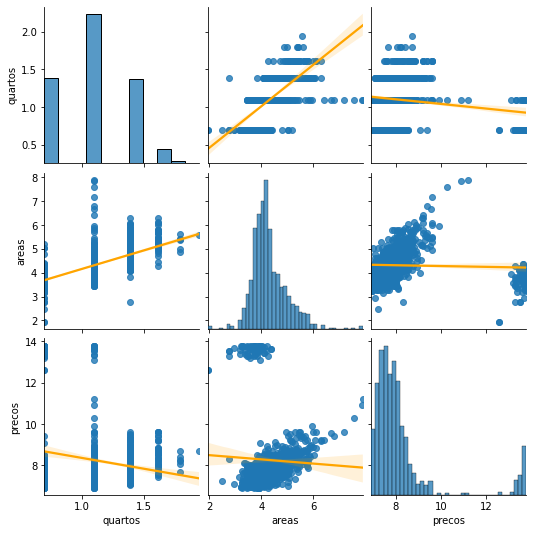

In [20]:
sns.pairplot(treino_num, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

In [21]:
# fazendo ou não a remoção de outliers com IQR

REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25, 0.5, 0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3 - Q1

k = 1.5 
limite_inferior = Q1 - k * IQR
limite_superior = Q1 + k * IQR

# removendo valores nulos de IQR no treino
treino_num_sem_outlier = treino_num[treino_num >= limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier <= limite_superior].dropna()

if REMOVER_OUTLIERS:
    treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,quartos,areas,precos
173,1.098612,3.891820,7.314553
632,1.098612,4.025352,7.496097
170,1.386294,4.804021,8.006701
151,1.098612,4.060443,7.313887
403,1.098612,3.806662,7.529406
...,...,...,...
17,1.386294,4.262680,7.650169
162,1.098612,4.143135,7.735870
56,1.386294,4.394449,7.438384
792,0.693147,3.931826,6.908755


In [22]:
treino_num_sem_outlier.describe().T

,count,mean,std,min,25%,50%,75%,max
quartos,657.0,1.067746,0.247905,0.693147,1.098612,1.098612,1.098612,1.609438
areas,657.0,4.148155,0.377652,2.944439,3.912023,4.143135,4.394449,4.955827
precos,657.0,7.642059,0.407990,6.908755,7.346655,7.601402,7.937732,8.699681


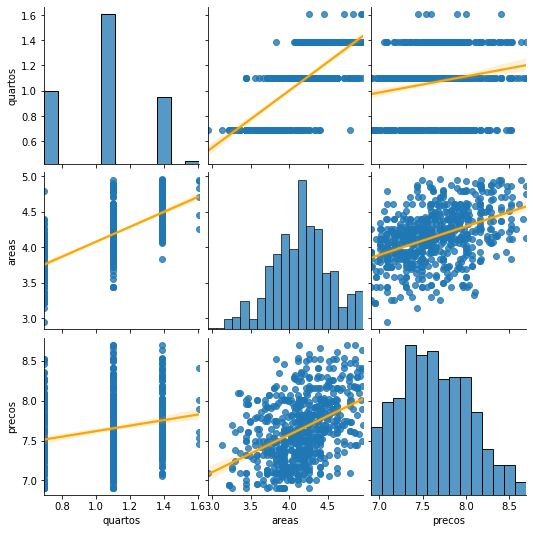

In [23]:
sns.pairplot(treino_num_sem_outlier, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

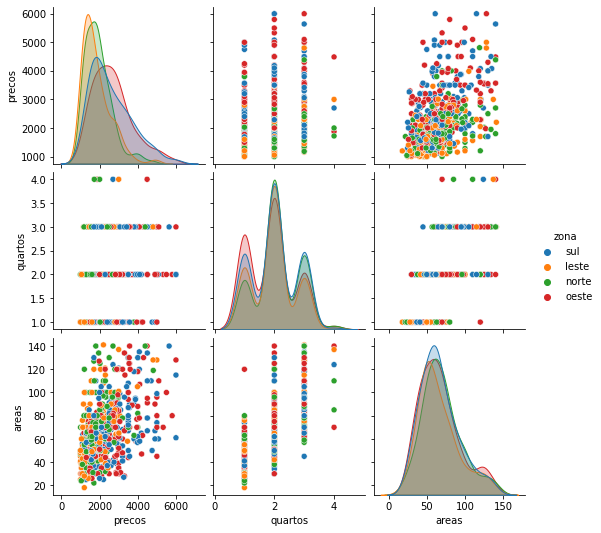

In [24]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='zona');

Tratando colunas categóricas

In [25]:
cat_cols = ['zona']
treino_cat = treino[cat_cols]

In [26]:
# usando one hot encoding
treino_cat = pd.get_dummies(treino_cat)

In [27]:
treino_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 306 to 620
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   zona_leste  864 non-null    uint8
 1   zona_norte  864 non-null    uint8
 2   zona_oeste  864 non-null    uint8
 3   zona_sul    864 non-null    uint8
dtypes: uint8(4)
memory usage: 50.1 KB


In [28]:
treino = pd.concat([treino_cat, treino_num], axis=1)

In [29]:
treino.head()

,zona_leste,zona_norte,zona_oeste,zona_sul,quartos,areas,precos
306,0,1,0,0,0.693147,5.017280,7.003974
173,0,0,0,1,1.098612,3.891820,7.314553
537,0,1,0,0,1.386294,5.375278,7.824446
632,1,0,0,0,1.098612,4.025352,7.496097
170,0,0,0,1,1.386294,4.804021,8.006701


Repetindo o preprocessamentos para o conjunto de testes

In [30]:
# Preenchendo valores faltantes com medianas 

# Importante: NUNCA usar informações do conjunto de testes, por isso estamos usando as medianas do conjunto de treino
teste = teste.fillna(treino_medianas)
teste.head()

,zona,precos,quartos,areas
154,sul,4500.0,2.0,100.0
16,sul,2880.0,1.0,33.0
1078,oeste,6000.0,4.0,120.0
209,sul,2600.0,2.0,62.0
741,leste,1700.0,2.0,90.0


In [31]:
# aplicando log1p nos valores numericos
teste[num_cols] = teste[num_cols].apply(np.log1p)
teste.head()

,zona,precos,quartos,areas
154,sul,8.412055,1.098612,4.615121
16,sul,7.965893,0.693147,3.526361
1078,oeste,8.699681,1.609438,4.795791
209,sul,7.863651,1.098612,4.143135
741,leste,7.438972,1.098612,4.510860


In [32]:
# fazendo one hot encoding

teste_onehot = pd.get_dummies(teste[cat_cols])
teste=pd.concat([teste_onehot, teste[num_cols]], axis=1)
teste.head()

,zona_leste,zona_norte,zona_oeste,zona_sul,quartos,areas,precos
154,0,0,0,1,1.098612,4.615121,8.412055
16,0,0,0,1,0.693147,3.526361,7.965893
1078,0,0,1,0,1.609438,4.795791,8.699681
209,0,0,0,1,1.098612,4.143135,7.863651
741,1,0,0,0,1.098612,4.510860,7.438972


Salvando arquivos de treino e teste preprocessados

In [33]:
treino.to_csv('treino_preprocessado.csv', index=False)

In [34]:
teste.to_csv('teste_preprocessado.csv', index=False)